In [1]:
import datetime
import numpy as np
import pandas as pd
import prettyplotlib as ppl
import pylab
import csv
from pandas import Series,DataFrame
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import lines
from pylab import figure, show, legend, ylabel
%matplotlib inline

In [2]:
###################################################################################################################

Load_Steps=(("0% Load",'','2016-03-08 16:05:00'),
            ("25% Load",'2016-03-08 17:00:00','2016-03-08 17:05:00'))
#            ("50% Load",'2016-03-08 11:45:00','2016-03-08 11:50:00'),
#            ("75% Load",'2016-03-08 12:45:00','2016-03-08 12:50:00'),
#            ("100% Load",'2016-03-08 13:30:00','2016-03-08 13:35:00'))


def STEPS():
    plt.text(Load_Steps[0][2],LOAD_STEP_POS,Load_Steps[0][0], color=SEP,rotation=0)
    for k in range(1,len(Load_Steps)):
        plt.text(Load_Steps[k][2],LOAD_STEP_POS,Load_Steps[k][0], color=SEP,rotation=0)
        ax.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)
            
def STEPS_1():
    plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
    for k in range(1,len(Load_Steps)):
        plt.text(Load_Steps[k][2],LOAD_STEP_POS_1,Load_Steps[k][0], color=SEP,rotation=0)
        ax.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)
            
def STEPS_2():
    plt.text(Load_Steps[0][2],LOAD_STEP_POS_2,Load_Steps[0][0], color=SEP,rotation=0)
    for k in range(1,len(Load_Steps)):
        plt.text(Load_Steps[k][2],LOAD_STEP_POS_2,Load_Steps[k][0], color=SEP,rotation=0)
        ax.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)

DOMAIN=('2016-03-08 15:00:00','2016-03-08 23:00:00')

#Vertical Seperator Color and Line Width
SEP=('#555555')
SEP_LW=0.4
DPI=300
# Create a color Palette for graphs.
COLORS=('#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499',
       '#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499')

# Create line styles
LS=('solid','dashed','dashdot')

###################################################################################################################

In [3]:
# DEFINE THE DATE OF THE DATA TO IMPORT "07MAR2016", "08MAR2016" AND "08MAR2016"
DATA_DATE =('08MAR2016'+'\\')

# DEFINE THE ROOT DIRECTORY WHERE THE DATA IS STORED; LAPTOP IS TOP, CUSTOM BUILD IS BOTTOM.
#DATA_ROOT_FOLDER =('C:\\Users\\ncatalano\\TRENDS\\')
DATA_ROOT_FOLDER =('C:\\Users\\Nicks_Custom\\TRENDS\\')

In [4]:
##Imports the txt files created from command promt which lists the folders of all the equipment.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'equipment.txt'),"r")
equipment_list=fileopen.readlines()
fileopen.close()

##Format the import##
for i in range(len(equipment_list)):
    equipment_list[i]=equipment_list[i][39:][:-1]

In [5]:
##Import Air Tower File Structure Data##

##Imports the txt files created from command promt which lists the folders of all the Air Towers.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'at_folders.txt'),"r")
AT_FOLDERS=fileopen.readlines()
fileopen.close()

AT_LEGEND={}
##Format the import##
for i in range(len(AT_FOLDERS)):
    AT_FOLDERS[i]=AT_FOLDERS[i][39:][:-1]
    AT_LEGEND[i]=AT_FOLDERS[i][:6]    

##Imports the txt files created from command promt which lists the files in the Air Towers folder.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'at_files.txt'),"r")
AT_FILES=fileopen.readlines()
fileopen.close()

##Format the import##
for i in range(len(AT_FILES)):
    AT_FILES[i]=AT_FILES[i][39:][:-1]

##Labels for Graphs
AT_LABELS={}
for i in range(len(AT_FILES)):
    AT_LABELS[i]=AT_FILES[i][:-4]

In [6]:
################  Create a new DataFrame for AT files  ################ 

AT_DATA={}
for i in range(len(AT_FOLDERS)):
    AT_DATA[i]=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[0] + '\\'+ AT_FOLDERS[i]+'\\'+ AT_FILES[0],header=1,index_col=0,parse_dates=[0])
    AT_DATA[i]=AT_DATA[i].drop(AT_DATA[i].columns[[0,2]],axis=1)
    AT_DATA[i]=AT_DATA[i].rename(columns={'Value': AT_LABELS[0]})

    for j in range(1,len(AT_FILES)):
        temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[0] + '\\'+ AT_FOLDERS[i]+'\\'+ AT_FILES[j],header=1,index_col=0,parse_dates=[0])
        temp=temp.drop(temp.columns[[0,2]],axis=1)
        temp=temp.rename(columns={'Value': AT_LABELS[j]})
        AT_DATA[i]=pd.concat([AT_DATA[i],temp],axis=1)

    AT_DATA[i].fillna(method='pad',inplace=True)
    
    
############# Create a DataFrame for Calculated Return Air ##########

CALC_RA={}
TEMP=AT_DATA[0]
TEMP=TEMP.loc[DOMAIN[0]:DOMAIN[1]]
SA=TEMP[TEMP.columns[[5]]] #Column 5 is the Supply air Flow Rate
OA=TEMP[TEMP.columns[[2]]] #Column 2 is the Outside air Flow Rate

TEMP=pd.DataFrame((SA.values-OA.values)/2,index=SA.index)
CALC_RA=TEMP.rename(columns={0: AT_LEGEND[0]})


for i in range(1,len(AT_FOLDERS)):
    TEMP={}
    TEMP=AT_DATA[i]
    TEMP=TEMP.loc[DOMAIN[0]:DOMAIN[1]]
    
    SA=TEMP[TEMP.columns[[5]]]
    OA=TEMP[TEMP.columns[[2]]] 

    TEMP=pd.DataFrame((SA.values-OA.values)/2,index=SA.index)
    TEMP=TEMP.rename(columns={0: AT_LEGEND[i]})
    CALC_RA=pd.concat([CALC_RA,TEMP],axis=1)




In [7]:
##Import Chilled Water File Structure Data##

##Imports the txt files created from command promt which lists the folders of the Chilled Water Risers.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'CHW_FOLDERS.txt'),"r")
CHW_FOLDERS=fileopen.readlines()
fileopen.close()

CHW_LEGEND={}
##Format the import##
for i in range(len(CHW_FOLDERS)):
    CHW_FOLDERS[i]=CHW_FOLDERS[i][39:][:-1]
    CHW_LEGEND[i]=CHW_FOLDERS[i][:6]    

##Imports the txt files created from command promt which lists the files in the Chilled Water Risers folder.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'CHW_FILES.txt'),"r")
CHW_FILES=fileopen.readlines()
fileopen.close()

##Format the import##
for i in range(len(CHW_FILES)):
    CHW_FILES[i]=CHW_FILES[i][39:][:-1]

##Labels for Graphs
CHW_LABELS={}
for i in range(len(CHW_FILES)):
    CHW_LABELS[i]=CHW_FILES[i][:-4]
    
################  Create a new DataFrame for Chilled Water files  ################ 

CHW_DATA={}
for i in range(len(CHW_FOLDERS)):
    CHW_DATA[i]=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[1] + '\\'+ CHW_FOLDERS[i]+'\\'+ CHW_FILES[0],header=1,index_col=0,parse_dates=[0])
    CHW_DATA[i]=CHW_DATA[i].drop(CHW_DATA[i].columns[[0,2]],axis=1)
    CHW_DATA[i]=CHW_DATA[i].rename(columns={'Value': CHW_LABELS[0]})

    for j in range(1,len(CHW_FILES)):
        temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[1] + '\\'+ CHW_FOLDERS[i]+'\\'+ CHW_FILES[j],header=1,index_col=0,parse_dates=[0])
        temp=temp.drop(temp.columns[[0,2]],axis=1)
        temp=temp.rename(columns={'Value': CHW_LABELS[j]})
        CHW_DATA[i]=pd.concat([CHW_DATA[i],temp],axis=1)

    CHW_DATA[i].fillna(method='pad',inplace=True)

In [8]:
#########################################  SUPPLY_FANS (5TH FLOOR) #########################################

##Imports the txt files created from command promt which lists the files in the supply fan folders.##

##SF-6-1 ##_
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'sf_folders.txt'),"r")
SF_FOLDERS=fileopen.readlines()##Imports the txt files created from command promt which lists the files in the supply fan files.##

for i in range(len(SF_FOLDERS)):
    SF_FOLDERS[i]=SF_FOLDERS[i][39:][:-1]

##Imports the txt files created from command promt which lists the files in the supply fan files.##

##SF-5-1 AND SF-5-2 ##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'sf_5_1_and_5_2_points.txt'),"r")
SF_5_FLOOR=fileopen.readlines()
fileopen.close()

##Format the import##
SF_5_LEGEND={}
for i in range(len(SF_5_FLOOR)):
    SF_5_FLOOR[i]=SF_5_FLOOR[i][39:][:-1]
    SF_5_LEGEND[i]=SF_5_FLOOR[i][:-4]
    
SF_5_DATA={}
    
SF_5_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[2] + '\\'+SF_FOLDERS[0] +'\\'+ SF_5_FLOOR[0],header=1,index_col=0,parse_dates=[0])
SF_5_DATA=SF_5_DATA.drop(SF_5_DATA.columns[[0,2]],axis=1)
SF_5_DATA=SF_5_DATA.rename(columns={'Value':SF_5_LEGEND[0]})
 
##IMPORT DATA
for i in range(1,len(SF_5_FLOOR)):
    temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[2] + '\\'+SF_FOLDERS[0] + '\\'+ SF_5_FLOOR[i],header=1,index_col=0,parse_dates=[0])
    temp=temp.drop(temp.columns[[0,2]],axis=1)
    temp=temp.rename(columns={'Value':SF_5_LEGEND[i]})
    SF_5_DATA=pd.concat([SF_5_DATA,temp],axis=1)    

SF_5_DATA.fillna(method='pad',inplace=True)

#########################################  SUPPLY_FANS (6TH FLOOR) #########################################

##Imports the txt files created from command promt which lists the files in the supply fan files.##

##SF-6-1 ##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'sf_6_1_points.txt'),"r")
SF_6_FLOOR=fileopen.readlines()
fileopen.close()

##Format the import##
SF_6_LEGEND={}
for i in range(len(SF_6_FLOOR)):
    SF_6_FLOOR[i]=SF_6_FLOOR[i][39:][:-1]
    SF_6_LEGEND[i]=SF_6_FLOOR[i][:-4]
    
SF_6_DATA={}
    
SF_6_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[2] + '\\'+SF_FOLDERS[1] +'\\'+ SF_6_FLOOR[0],header=1,index_col=0,parse_dates=[0])
SF_6_DATA=SF_6_DATA.drop(SF_6_DATA.columns[[0,2]],axis=1)
SF_6_DATA=SF_6_DATA.rename(columns={'Value':SF_6_LEGEND[0]})
 
##IMPORT DATA
for i in range(1,len(SF_6_FLOOR)):
    temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[2] + '\\'+SF_FOLDERS[1] + '\\'+ SF_6_FLOOR[i],header=1,index_col=0,parse_dates=[0])
    temp=temp.drop(temp.columns[[0,2]],axis=1)
    temp=temp.rename(columns={'Value':SF_6_LEGEND[i]})
    SF_6_DATA=pd.concat([SF_6_DATA,temp],axis=1)

SF_6_DATA.fillna(method='pad',inplace=True)
                 
##############################  SUPPLY FAN GRAPH DATA ##############################

SUPPLY_FAN_GRAPH=pd.concat([SF_5_DATA[SF_5_LEGEND[0]],SF_5_DATA[SF_5_LEGEND[1]],SF_6_DATA[SF_6_LEGEND[0]]],axis=1)

In [9]:
#########################################  STATIC_PRESSURE  #########################################

##Imports the txt files created from command promt which lists the files in the Static Pressure folder.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'static_pressure.txt'),"r")
STATIC_PRESSURE=fileopen.readlines()
fileopen.close()

##Format the import##
SP_LEGEND={}
for i in range(len(STATIC_PRESSURE)):
    STATIC_PRESSURE[i]=STATIC_PRESSURE[i][39:][:-1]
    SP_LEGEND[i]=STATIC_PRESSURE[i][:-4]
    
SP_DATA={}
    
SP_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[3] + '\\'+ STATIC_PRESSURE[0],header=1,index_col=0,parse_dates=[0])
SP_DATA=SP_DATA.drop(SP_DATA.columns[[0,2]],axis=1)
SP_DATA=SP_DATA.rename(columns={'Value':SP_LEGEND[0]})
 
##IMPORT DATA
for i in range(1,len(STATIC_PRESSURE)):
    temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[3] + '\\'+ STATIC_PRESSURE[i],header=1,index_col=0,parse_dates=[0])
    temp=temp.drop(temp.columns[[0,2]],axis=1)
    temp=temp.rename(columns={'Value':SP_LEGEND[i]})
    SP_DATA=pd.concat([SP_DATA,temp],axis=1)
    
SP_DATA.fillna(method='pad',inplace=True)

SP_AVE=pd.DataFrame(SP_DATA.mean(axis=1),columns=['Average'])

In [10]:
#################################### 5th Floor STATIC_PRESSURE ####################################
#######################################    GRAPH POINTS   #########################################
SP_5_AVE={}
SP_5_DATA={}

##Removed 'Floor Static Pressure-11' because it wasn't connected.
##Removed JSES points 

SP_5_DATA=SP_DATA.drop(SP_DATA.columns[[2,11,12]],axis=1)
SP_5_AVE=pd.DataFrame(SP_5_DATA.mean(axis=1),columns=['Average'])

In [11]:
#################################### 6th Floor STATIC_PRESSURE ####################################
#######################################    GRAPH POINTS   #########################################
SP_6_AVE={}
SP_6_DATA1={}
SP_6_DATA2={}

##Removed 'Floor Static Pressure-11' because it wasn't connected.
##Removed JSES points 

SP_6_DATA1=pd.concat([SP_DATA[SP_LEGEND[11]],SP_DATA[SP_LEGEND[12]]],axis=1)
SP_6_DATA2=pd.concat([SF_5_DATA[SF_5_LEGEND[2]]],axis=1)
SP_6_DATA_TOT=pd.concat([SP_6_DATA1,SP_6_DATA2],axis=1)
SP_6_AVE=pd.DataFrame(SP_6_DATA_TOT.mean(axis=1),columns=['Average'])

In [12]:
########################  HOBO TEMPERATURE AND HUMIDITY  ########################
                            
TEMP_DATA={}
RH_DATA={}

TEMP_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[4] + '\\'+'RTV-IST-DATA-TEMP.csv',header=0,index_col=0,parse_dates=[0])
RH_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[4] + '\\'+'RTV-IST-DATA-RH.csv',header=0,index_col=0,parse_dates=[0])
TEMP_DATA.fillna(method='pad',inplace=True)
RH_DATA.fillna(method='pad',inplace=True)

COLUMNS1=TEMP_DATA.columns
TEMP_LABELS={}
STRING1=('TEMP SENSOR')
for i in range(len(COLUMNS1)):
    TEMP_LABELS[i]=STRING1+COLUMNS1[i][54:]

COLUMNS2=RH_DATA.columns
RH_LABELS={}
STRING2=('RH SENSOR')
for i in range(len(COLUMNS2)):
    RH_LABELS[i]=STRING2+COLUMNS2[i][54:]
    
####  5th Floor Temp and RH  ###
TEMP_5_DATA= TEMP_DATA.drop(TEMP_DATA.columns[[6,7]],axis=1)
RH_5_DATA= RH_DATA.drop(RH_DATA.columns[[6,7]],axis=1)

####  JSES Floor Temp and RH  ###
TEMP_6_DATA= TEMP_DATA.drop(TEMP_DATA.columns[[0,1,2,3,4,5,8,9,10]],axis=1)
RH_6_DATA= RH_DATA.drop(RH_DATA.columns[[0,1,2,3,4,5,8,9,10]],axis=1)


TEMP_5_AVE=pd.DataFrame(TEMP_5_DATA.mean(axis=1),columns=['Average'])
RH_5_AVE=pd.DataFrame(RH_5_DATA.mean(axis=1),columns=['Average'])

TEMP_6_AVE=pd.DataFrame(TEMP_6_DATA.mean(axis=1),columns=['Average'])
RH_6_AVE=pd.DataFrame(RH_6_DATA.mean(axis=1),columns=['Average'])


In [13]:
#########################################  EPMS  #########################################
##Imports the txt files created from command promt which lists the files in the EPMS folder.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'epms.txt'),"r")
EPMS_FILES=fileopen.readlines()
fileopen.close()

##Format the import##
EPMS_LEGEND={}
for i in range(len(EPMS_FILES)):
    EPMS_FILES[i]=EPMS_FILES[i][39:][:-1]
    EPMS_LEGEND[i]=EPMS_FILES[i][:-4]

EPMS_DATA={}
    
EPMS_DATA=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[11] + '\\'+ EPMS_FILES[0],header=0,index_col=0,parse_dates=[0])
EPMS_DATA=EPMS_DATA.rename(columns={'Real Power Mean':EPMS_LEGEND[0]})
 
##IMPORT DATA
for i in range(1,len(EPMS_FILES)):
    temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[11] + '\\'+ EPMS_FILES[i],header=0,index_col=0,parse_dates=[0])
    temp=temp.rename(columns={'Real Power Mean':EPMS_LEGEND[i]})
    EPMS_DATA=pd.concat([EPMS_DATA,temp],axis=1)  

EPMS_DATA.fillna(method='pad',inplace=True)


#########################################  EPMS  CRITICAL SWITCHBOARD #########################################
##Imports the txt files created from command promt which lists the files in the EPMS folder.##
#fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'epms1.txt'),"r")
#EPMS_FILES1=fileopen.readlines()
#fileopen.close()

##Format the import##
#EPMS_LEGEND1={}
#for i in range(len(EPMS_FILES1)):
#    EPMS_FILES1[i]=EPMS_FILES1[i][39:][:-1]
#    EPMS_LEGEND1[i]=EPMS_FILES1[i][:-4]

#EPMS_DATA1={}
    
#EPMS_DATA1=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[11] + '\\'+ EPMS_FILES1[0],header=0,index_col=0,parse_dates=[0])
#EPMS_DATA1=EPMS_DATA1.rename(columns={'Real Power Mean':EPMS_LEGEND1[0]})
 
##IMPORT DATA
#for i in range(1,len(EPMS_FILES1)):
#    temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[11] + '\\'+ EPMS_FILES1[i],header=0,index_col=0,parse_dates=[0])
#    temp=temp.rename(columns={'Real Power Mean':EPMS_LEGEND1[i]})
#    EPMS_DATA1=pd.concat([EPMS_DATA1,temp],axis=1)  
#
#EPMS_DATA1.fillna(method='pad',inplace=True)

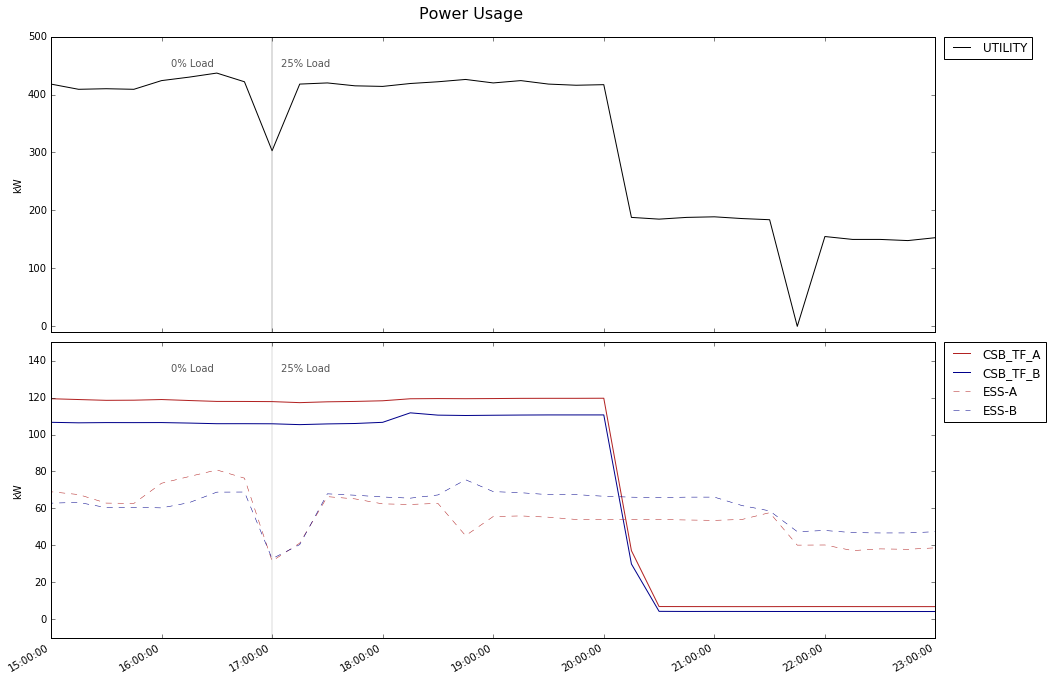

In [14]:
###################################         EPMS GRAPH           #############################################

GRAPH_COLORS=('#B22222','#00008B','#B22222','#00008B','black')
GRAPH_LS=('solid','solid','dashed','dashed','solid')
GRAPH_LW=[1,1,.5,.5,1]
GRAPH_LEGEND=EPMS_LEGEND
GRAPH1_DATA=EPMS_DATA[GRAPH_LEGEND[0]]
DELTA=(0.1)

###################################  GRAPH 1 DATA CONSTRUCTION  ###################################

for i in range(1,len(EPMS_LEGEND)-1):
    temp=EPMS_DATA[EPMS_LEGEND[i]]
    GRAPH1_DATA=pd.concat([GRAPH1_DATA,temp],axis=1)

GRAPH1=GRAPH1_DATA.loc[DOMAIN[0]:DOMAIN[1]]

    
GRAPH1_MAX=GRAPH1.values.max()
GRAPH1_MIN=GRAPH1.values.min()
DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
GRAPH1_MAX=150
GRAPH1_MIN=-10
LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA

###################################  GRAPH 2 DATA CONSTRUCTION  ###################################

GRAPH2_DATA=EPMS_DATA[GRAPH_LEGEND[4]]
    
GRAPH2=GRAPH2_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH2_MAX=GRAPH2.values.max()
GRAPH2_MIN=GRAPH2.values.min()
DELTA2=(GRAPH2_MAX-GRAPH2_MIN)*DELTA*2
GRAPH2_MAX=500
GRAPH2_MIN=-10
LOAD_STEP_POS_2=GRAPH2_MAX-(GRAPH2_MAX-GRAPH2_MIN)*DELTA

fig, ax = plt.subplots(2, 1)

##################################### SUB-PLOT 1 #####################################
plt.subplot(2,1,2)
ax=GRAPH1_DATA[GRAPH_LEGEND[0]].plot(color = GRAPH_COLORS[0] , linestyle =GRAPH_LS[0], lw=GRAPH_LW[0],figsize=(14,10))
for i in range(1,len(GRAPH_LEGEND)-1):
    ax=GRAPH1_DATA[GRAPH_LEGEND[i]].plot(ax=ax,color = GRAPH_COLORS[i], linestyle =GRAPH_LS[i],lw=GRAPH_LW[i])

plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_1,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=0.2)

plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
plt.ylabel("kW")
plt.xlabel("")
plt.gcf().autofmt_xdate()
plt.legend(bbox_to_anchor=(1.01,1),loc=2, borderaxespad=0);


##################################### SUB-PLOT 2 #####################################
plt.subplot(2,1,1)
bx=GRAPH2_DATA.plot(color = GRAPH_COLORS[4] , linestyle =GRAPH_LS[4], lw=GRAPH_LW[4],figsize=(14,10))

plt.text(Load_Steps[0][2],LOAD_STEP_POS_2,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_2,Load_Steps[i][0], color=SEP,rotation=0)
    bx.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH2_MIN,GRAPH2_MAX)
plt.ylabel("kW")
plt.xlabel("")
plt.gcf().autofmt_xdate()

plt.legend( bbox_to_anchor=(1.01,1),loc=2, borderaxespad=0);


fig.suptitle('Power Usage',size=16)
fig.tight_layout(pad=4, w_pad=0.6, h_pad=1)

plt.savefig('01_Power Usage.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

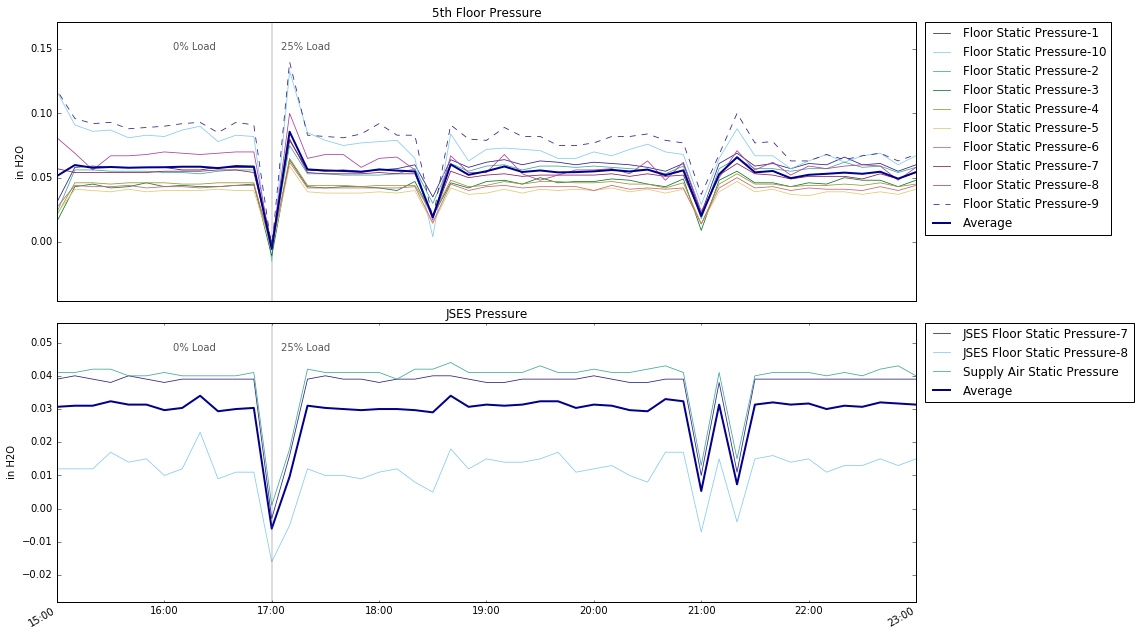

In [15]:
###################################  STATIC PRESSURE PLOTS  ###################################

DELTA=(0.1)

###################################  GRAPH 1 DATA CONSTRUCTION  ###################################

GRAPH1_DATA=SP_5_DATA
GRAPH1_LEGEND=GRAPH1_DATA.columns
GRAPH1_AVE=SP_5_AVE  

GRAPH1=GRAPH1_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH1_MAX=GRAPH1.values.max()
GRAPH1_MIN=GRAPH1.values.min()
DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
GRAPH1_MAX=GRAPH1_MAX+DELTA1
GRAPH1_MIN=GRAPH1_MIN-DELTA1
LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA

###################################  GRAPH 2 DATA CONSTRUCTION  ###################################

GRAPH2_DATA=pd.concat([SP_6_DATA1,SP_6_DATA2],axis=1)
GRAPH2_DATA.fillna(method='pad',inplace=True)
GRAPH2_LEGEND=GRAPH2_DATA.columns
GRAPH2_AVE=SP_6_AVE
    
GRAPH2=GRAPH2_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH2_MAX=GRAPH2.values.max()
GRAPH2_MIN=GRAPH2.values.min()
DELTA2=(GRAPH2_MAX-GRAPH2_MIN)*DELTA*2
GRAPH2_MAX=GRAPH2_MAX+DELTA2
GRAPH2_MIN=GRAPH2_MIN-DELTA2
LOAD_STEP_POS_2=GRAPH2_MAX-(GRAPH2_MAX-GRAPH2_MIN)*DELTA


##################################### SUB-PLOT 1 #####################################
plt.subplot(2,1,1)

LS=('solid','dashed')
j=0
ax=GRAPH1_DATA[GRAPH1_LEGEND[0]].plot(linestyle=LS[j],color=COLORS[0],lw=.8,figsize=(14,10))
for i in range(1,len(GRAPH1_LEGEND)):
    
    ax=GRAPH1_DATA[GRAPH1_LEGEND[i]].plot(ax=ax,color=COLORS[i],linestyle=LS[j],lw=.8)
    if i > 7:
        j=1    
    
GRAPH1_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=2)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_1,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
plt.title("5th Floor Pressure")
plt.ylabel("in H2O")
plt.xlabel("")
ax.axes.get_xaxis().set_visible(False)
plt.gcf().autofmt_xdate()
ax.legend(bbox_to_anchor=(1.01,1),loc=2, borderaxespad=0);


##################################### SUB-PLOT 2 #####################################
plt.subplot(2,1,2)

LS=('solid','dashed')
j=0

ax=GRAPH2_DATA[GRAPH2_LEGEND[0]].plot(color =COLORS[0], linestyle=LS[j],lw=.8,figsize=(14,10))
for i in range(1,len(GRAPH2_LEGEND)):
    ax=GRAPH2_DATA[GRAPH2_LEGEND[i]].plot(ax=ax,color =COLORS[i], linestyle=LS[j],lw=.8)
    if i > 4:
        j=1
        
GRAPH2_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=2)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_2,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_2,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH2_MIN,GRAPH2_MAX)
plt.title("JSES Pressure")
plt.ylabel("in H2O")
plt.xlabel("")
plt.gcf().autofmt_xdate()

ax.legend( bbox_to_anchor=(1.01,1),loc=2, borderaxespad=0);

plt.tight_layout(pad=5, w_pad=0.6, h_pad=.75)

plt.savefig('02_UNDERFLOOR_STATIC.jpeg', format='jpeg', dpi=DPI,bbox_inches="tight")

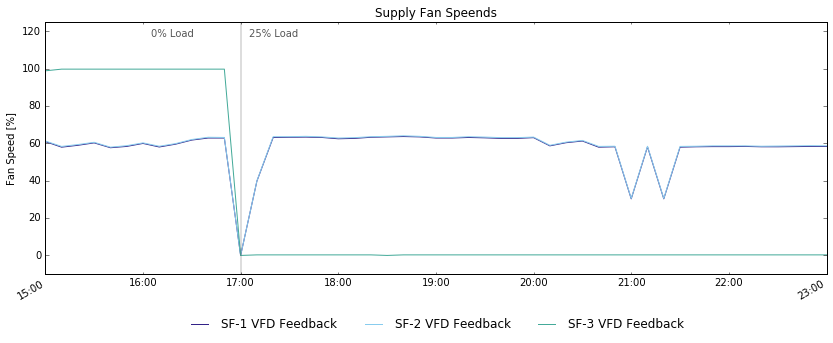

In [16]:
#####################################  SUPPLY FAN GRAPHS ##################################### 
GRAPH1_DATA=SUPPLY_FAN_GRAPH
GRAPH1_LEGEND=GRAPH1_DATA.columns
GRAPH1_DATA.fillna(value=0,inplace=True)

GRAPH1=GRAPH1_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH1_MAX=GRAPH1.values.max()
GRAPH1_MIN=GRAPH1.values.min()
DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
GRAPH1_MAX=125
GRAPH1_MIN=-10
LOAD_STEP_POS_1=117


ax=GRAPH1_DATA.plot(linestyle='solid',lw=1,color =COLORS,figsize=(14,5))

plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_1,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
plt.title("Supply Fan Speends")
plt.ylabel("Fan Speed [%]")
plt.xlabel("")
plt.gcf().autofmt_xdate()

plt.legend(bbox_to_anchor=(0.5,-.2),loc=10,ncol=3).get_frame().set_linewidth(0.0);
plt.savefig('01_SUPPLY_FANS.jpeg', format='jpeg', dpi=DPI,bbox_inches="tight")

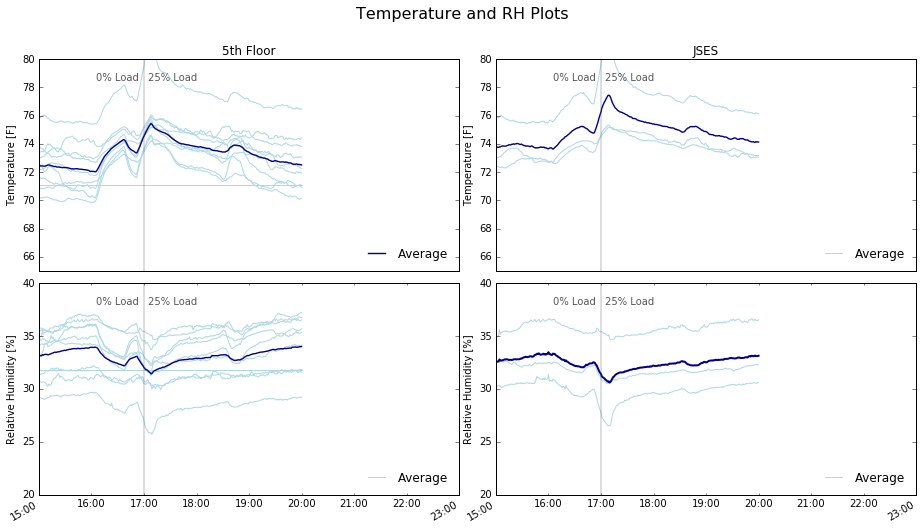

In [17]:

#################################  HOBO DATA (TEMP / HUMIDITY )  ################################# 

###################################  GRAPH 1 DATA CONSTRUCTION  ###################################

GRAPH1_DATA=TEMP_5_DATA
GRAPH1_LEGEND=GRAPH1_DATA.columns
GRAPH1_DATA.fillna(value=0,inplace=True)
GRAPH1_AVE=TEMP_5_AVE

GRAPH1=GRAPH1_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH1_MAX=GRAPH1.values.max()
GRAPH1_MIN=GRAPH1.values.min()
DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
GRAPH1_MAX=80
GRAPH1_MIN=65
LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA

###################################  GRAPH 2 DATA CONSTRUCTION  ###################################

GRAPH2_DATA=TEMP_6_DATA
GRAPH2_LEGEND=GRAPH2_DATA.columns
GRAPH2_DATA.fillna(value=0,inplace=True)
GRAPH2_AVE=TEMP_6_AVE
    
GRAPH2=GRAPH2_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH2_MAX=GRAPH2.values.max()
GRAPH2_MIN=GRAPH2.values.min()
DELTA2=(GRAPH2_MAX-GRAPH2_MIN)*DELTA*2
GRAPH2_MAX=80
GRAPH2_MIN=65
LOAD_STEP_POS_2=GRAPH2_MAX-(GRAPH2_MAX-GRAPH2_MIN)*DELTA

###################################  GRAPH 3 DATA CONSTRUCTION  ###################################

GRAPH3_DATA=RH_5_DATA
GRAPH3_LEGEND=GRAPH3_DATA.columns
GRAPH3_DATA.fillna(value=0,inplace=True)
GRAPH3_AVE=RH_5_AVE  

GRAPH3=GRAPH3_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH3_MAX=GRAPH3.values.max()
GRAPH3_MIN=GRAPH3.values.min()
DELTA3=(GRAPH3_MAX-GRAPH3_MIN)*DELTA*2
GRAPH3_MAX=40
GRAPH3_MIN=20
LOAD_STEP_POS_3=GRAPH3_MAX-(GRAPH3_MAX-GRAPH3_MIN)*DELTA

###################################  GRAPH 4 DATA CONSTRUCTION  ###################################

GRAPH4_DATA=RH_6_DATA
GRAPH4_LEGEND=GRAPH4_DATA.columns
GRAPH4_DATA.fillna(value=0,inplace=True)
GRAPH4_AVE=RH_6_AVE
    
GRAPH4=GRAPH4_DATA.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH4_MAX=GRAPH4.values.max()
GRAPH4_MIN=GRAPH4.values.min()
DELTA4=(GRAPH4_MAX-GRAPH4_MIN)*DELTA*2
GRAPH4_MAX=40
GRAPH4_MIN=20
LOAD_STEP_POS_4=GRAPH4_MAX-(GRAPH4_MAX-GRAPH4_MIN)*DELTA

##################################### SUB-PLOT 1 #####################################
plt.subplot(2,2,1)
ax=GRAPH1_DATA[GRAPH1_LEGEND[0]].plot(color ='lightblue', linestyle='solid',lw=1,figsize=(14,8))
for i in range(1,len(GRAPH1_LEGEND)):
    ax=GRAPH1_DATA[GRAPH1_LEGEND[i]].plot(ax=ax,color ='lightblue', linestyle='solid',lw=1)
GRAPH1_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=1.4)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_1,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)


plt.legend([ax.lines[10]],["Average"],loc=4).get_frame().set_linewidth(0.0)
plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
plt.title("5th Floor")
plt.ylabel("Temperature [F]")
plt.xlabel("")
ax.axes.get_xaxis().set_visible(False)
plt.gcf().autofmt_xdate()

##################################### SUB-PLOT 2 #####################################
plt.subplot(2,2,2)
ax=GRAPH2_DATA[GRAPH2_LEGEND[0]].plot(color ='lightblue', linestyle='solid',lw=1,figsize=(14,8))
for i in range(1,len(GRAPH2_LEGEND)):
    ax=GRAPH2_DATA[GRAPH2_LEGEND[i]].plot(ax=ax,color ='lightblue', linestyle='solid',lw=1)
GRAPH2_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=1.4)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_2,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_2,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.legend([ax.lines[2]],["Average"],loc=4).get_frame().set_linewidth(0.0)
plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH2_MIN,GRAPH2_MAX)
plt.title("JSES")
plt.ylabel("Temperature [F]")
plt.xlabel("")
ax.axes.get_xaxis().set_visible(False)
plt.gcf().autofmt_xdate()

##################################### SUB-PLOT 3 #####################################
plt.subplot(2,2,3)
ax=GRAPH3_DATA[GRAPH3_LEGEND[0]].plot(color ='lightblue', linestyle='solid',lw=1,figsize=(14,8))
for i in range(1,len(GRAPH3_LEGEND)):
    ax=GRAPH3_DATA[GRAPH3_LEGEND[i]].plot(ax=ax, color ='lightblue', linestyle='solid',lw=1)
GRAPH3_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=1.4)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_3,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_3,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)

plt.legend([ax.lines[8]],["Average"],loc=4).get_frame().set_linewidth(0.0)
plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH3_MIN,GRAPH3_MAX)
plt.ylabel("Relative Humidity [%]")
plt.xlabel("")
plt.gcf().autofmt_xdate()

##################################### SUB-PLOT 4 #####################################
plt.subplot(2,2,4)
ax=GRAPH4_DATA[GRAPH4_LEGEND[0]].plot(color ='lightblue', linestyle='solid',lw=1,figsize=(14,8))
for i in range(1,len(GRAPH4_LEGEND)):
    ax=GRAPH4_DATA[GRAPH4_LEGEND[i]].plot(ax=ax, color ='lightblue', linestyle='solid',lw=1)
GRAPH4_AVE.plot(ax=ax,color ='#00008B', linestyle='solid',lw=2)

plt.text(Load_Steps[0][2],LOAD_STEP_POS_4,Load_Steps[0][0], color=SEP,rotation=0)
for i in range(1,len(Load_Steps)):
    plt.text(Load_Steps[i][2],LOAD_STEP_POS_4,Load_Steps[i][0], color=SEP,rotation=0)
    ax.axvline(pd.to_datetime(Load_Steps[i][1]), color=SEP, linestyle='solid', lw=SEP_LW)
    
plt.legend([ax.lines[2]],["Average"],loc=4).get_frame().set_linewidth(0.0)
plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH4_MIN,GRAPH4_MAX)
plt.ylabel("Relative Humidity [%]")
plt.xlabel("")
plt.gcf().autofmt_xdate()

plt.suptitle('Temperature and RH Plots',size=16)
plt.tight_layout(pad=5, w_pad=0.6, h_pad=.75)
plt.savefig('02_HOBO_DATA.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

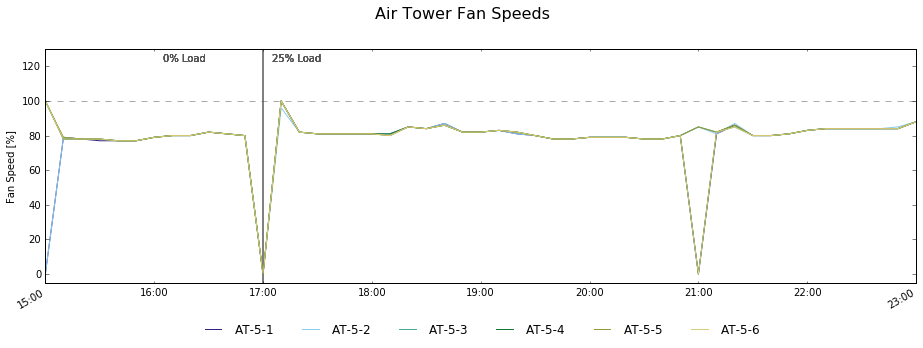

In [18]:
DELTA=(0.1)

Y_LABEL=('Fan Speed [%]')

fig, ax = plt.subplots(1,1)

for i in range(len(AT_FOLDERS)):

    
    TEMP1_DATA=AT_DATA[i]
    TEMP1_DATA=TEMP1_DATA.rename(columns={'Supply Fan VFD Control Signal':AT_LEGEND[i]})
    GRAPH_COLUMNS=TEMP1_DATA.columns[[9]]


    GRAPH1=TEMP1_DATA[GRAPH_COLUMNS]
    GRAPH1_LEGEND=GRAPH1.columns
    GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]
    
    GRAPH1_MAX=GRAPH1.values.max()
    GRAPH1_MIN=GRAPH1.values.min()
    DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
    GRAPH1_MAX=130
    GRAPH1_MIN=-5
    LOAD_STEP_POS_1=123
    
    plt.subplot(1,1,1)    
    ax=GRAPH1[GRAPH1_LEGEND[0]].plot(color =COLORS[i], linestyle='solid',lw=1,figsize=(14,5))
    for j in range(1,len(GRAPH1_LEGEND)):
        ax=GRAPH1[GRAPH1_LEGEND[j]].plot(ax=ax,color =COLORS[i], linestyle='solid',lw=1)


    plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
    for k in range(1,len(Load_Steps)):
        plt.text(Load_Steps[k][2],LOAD_STEP_POS_1,Load_Steps[k][0], color=SEP,rotation=0)
        ax.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)
    
    plt.xlim(DOMAIN[0], DOMAIN[1])
    plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
    plt.ylabel(Y_LABEL)
    plt.xlabel("")
          
plt.gcf().autofmt_xdate()
plt.axhline(y=100, color=SEP,linestyle='dashed',lw=0.5,hold=None)

plt.legend(bbox_to_anchor=(0.5,-.2),loc=10,ncol=6).get_frame().set_linewidth(0.0);
fig.suptitle('Air Tower Fan Speeds',size=16)
fig.tight_layout(pad=5, w_pad=0.6, h_pad=1)
plt.savefig('01_AT_FAN_SPEEDS.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

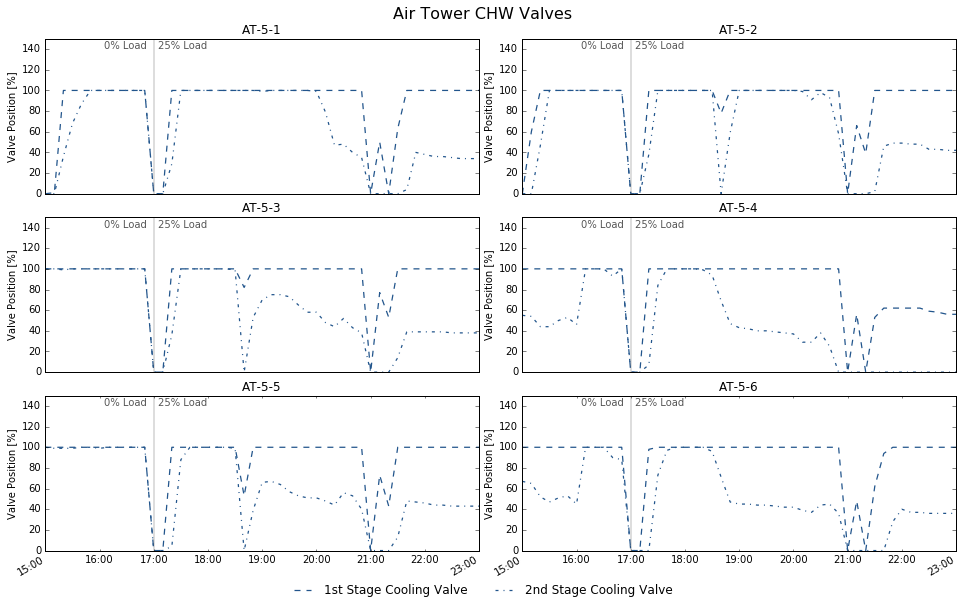

In [19]:
DELTA=(0.1)

Y_LABEL=('Valve Position [%]')

fig, ax = plt.subplots(3, 2)

for i in range(len(AT_FOLDERS)):
    visible=i
    
    TEMP1_DATA=AT_DATA[i]
    GRAPH_COLUMNS=TEMP1_DATA.columns[[0,1]]
    GRAPH1=TEMP1_DATA[GRAPH_COLUMNS]
    GRAPH1_LEGEND=GRAPH1.columns
    GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]
    LOAD_STEP_POS_1=140
    
    plt.subplot(3,2,i+1)    
    ax=GRAPH1[GRAPH1_LEGEND[0]].plot(color ='#22558C', linestyle='dashdot',lw=1.25,figsize=(14,8.5))
    for j in range(1,len(GRAPH1_LEGEND)):
        ax=GRAPH1[GRAPH1_LEGEND[j]].plot(ax=ax,color ='#22558C', linestyle='dashed',lw=1.25)

    plt.text(Load_Steps[0][2],LOAD_STEP_POS_1,Load_Steps[0][0], color=SEP,rotation=0)
    for k in range(1,len(Load_Steps)):
        plt.text(Load_Steps[k][2],LOAD_STEP_POS_1,Load_Steps[k][0], color=SEP,rotation=0)
        ax.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)
        
    ax.set_title(AT_LEGEND[i])
    plt.xlim(DOMAIN[0], DOMAIN[1])
    plt.ylim(0,150)
    plt.ylabel(Y_LABEL)
    plt.xlabel("")
    
    if visible < 4:
        ax.axes.get_xaxis().set_visible(False)
        
    plt.gcf().autofmt_xdate()
    
fig.suptitle('Air Tower CHW Valves',size=16)
fig.legend([ax.lines[1], ax.lines[0]], ['1st Stage Cooling Valve', '2nd Stage Cooling Valve'], 'lower center',ncol=2).get_frame().set_linewidth(0.0)
fig.tight_layout(pad=3, w_pad=0.6, h_pad=0.5)
plt.savefig('03_AT_CHW_VALVES.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

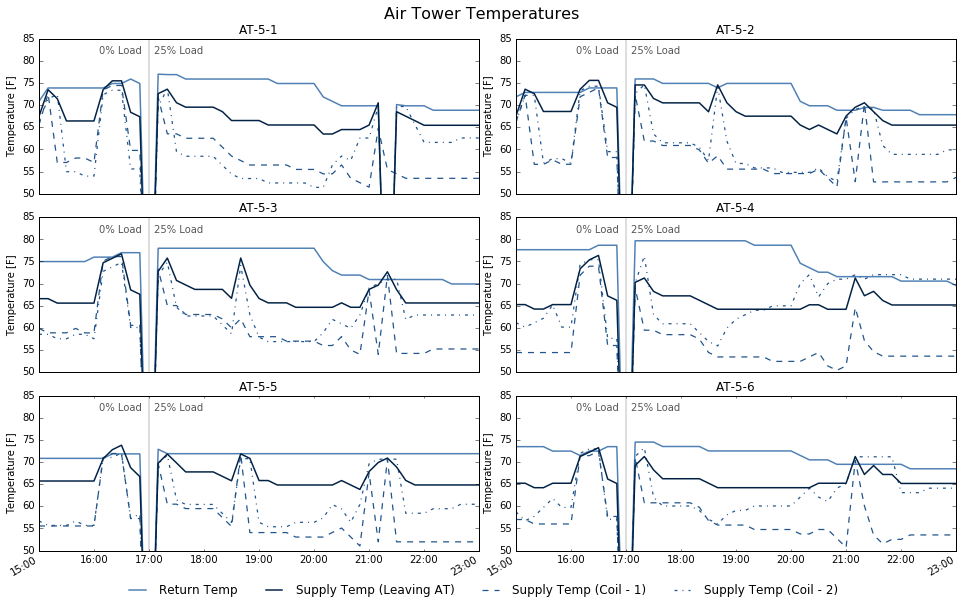

In [20]:
DELTA=(0.1)

Y_LABEL=('Temperature [F]')
fig, ax = plt.subplots(3, 2)
COLOR=('#5081B5','#22558C','#22558C','#022245')
LS=('solid','dashed','dashdot','solid')
LW=(1.5,1.25,1.25,1.5)

for i in range(len(AT_FOLDERS)):
    visible=i
    
    TEMP1_DATA=AT_DATA[i]
    GRAPH_COLUMNS=TEMP1_DATA.columns[[4,6,7,8]]
    
    
    GRAPH1=TEMP1_DATA[GRAPH_COLUMNS]
    GRAPH1_LEGEND=GRAPH1.columns
    GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]
    
    GRAPH1_MAX=85
    GRAPH1_MIN=50
    LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA
    
    plt.subplot(3,2,i+1)
    for j in range(len(GRAPH_COLUMNS)):
        ax=GRAPH1[GRAPH1_LEGEND[j]].plot(color =COLOR[j], linestyle=LS[j],lw=LW[j],figsize=(14,8.5))
    STEPS_1()
        
    ax.set_title(AT_LEGEND[i])
    plt.xlim(DOMAIN[0], DOMAIN[1])
    plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
    plt.ylabel(Y_LABEL)
    plt.xlabel("")
    
    if visible < 4:
        ax.axes.get_xaxis().set_visible(False)
        
    plt.gcf().autofmt_xdate()
    
fig.suptitle('Air Tower Temperatures',size=16)
fig.legend([ax.lines[0],ax.lines[3], ax.lines[1],ax.lines[2]], ['Return Temp','Supply Temp (Leaving AT)', 'Supply Temp (Coil - 1)','Supply Temp (Coil - 2)'], 'lower center',ncol=4).get_frame().set_linewidth(0.0)
fig.tight_layout(pad=3, w_pad=0.6, h_pad=.5)
plt.savefig('03_AT_TEMPERATURES.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

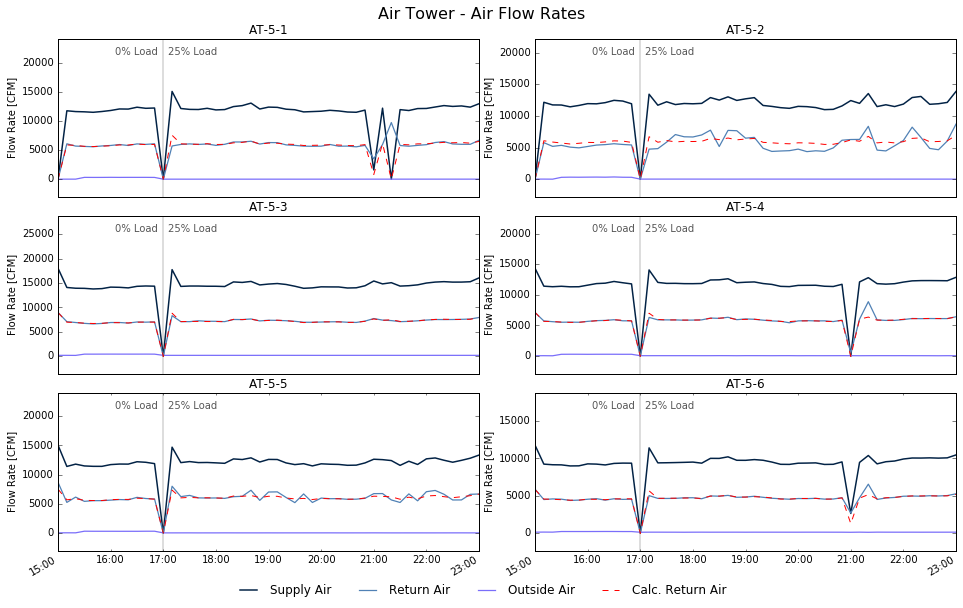

In [21]:
DELTA=(0.1)

Y_LABEL=('Flow Rate [CFM]')

fig, ax = plt.subplots(3, 2)

for i in range(len(AT_FOLDERS)):
    visible=i
    
    TEMP1_DATA=AT_DATA[i]
    GRAPH_COLUMNS=TEMP1_DATA.columns[[5,2,3]]
    GRAPH1=TEMP1_DATA[GRAPH_COLUMNS]
    GRAPH1_LEGEND=GRAPH1.columns
    GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]
    
    GRAPH1_MAX=GRAPH1.values.max()
    GRAPH1_MIN=GRAPH1.values.min()
    DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*2
    GRAPH1_MAX=GRAPH1_MAX+DELTA1*3
    GRAPH1_MIN=GRAPH1_MIN-DELTA1
    LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA
    
    plt.subplot(3,2,i+1)    
    ax=GRAPH1[GRAPH1_LEGEND[0]].plot(color ='#022245', linestyle='solid',lw=1.5,figsize=(14,8.5))
    ax=GRAPH1[GRAPH1_LEGEND[2]].plot(ax=ax,color ='#5081B5', linestyle='solid',lw=1.25)
    ax=GRAPH1[GRAPH1_LEGEND[1]].plot(ax=ax,color ='#7A6EFA', linestyle='solid',lw=1.25)    
    ax=CALC_RA[CALC_RA.columns[[i]]].plot(ax=ax,legend=None,color ='red', linestyle='dashed',lw=1)

    STEPS_1()
        
    ax.set_title(AT_LEGEND[i])
    plt.xlim(DOMAIN[0], DOMAIN[1])
    plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
    plt.ylabel(Y_LABEL)
    plt.xlabel("")
    
    if visible < 4:
        ax.axes.get_xaxis().set_visible(False)
        
    plt.gcf().autofmt_xdate()
    
fig.suptitle('Air Tower - Air Flow Rates',size=16)
fig.legend([ax.lines[0], ax.lines[1],ax.lines[2],ax.lines[3]], ['Supply Air', 'Return Air','Outside Air','Calc. Return Air'], 'lower center',ncol=4).get_frame().set_linewidth(0.0)
fig.tight_layout(pad=3, w_pad=0.6, h_pad=.5)
plt.savefig('04_AT_FLOW_RATES.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

In [22]:
##Import Chilled Water File Structure Data##

##Imports the txt files created from command promt which lists the folders of the Chilled Water Risers.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'CHW_FOLDERS.txt'),"r")
CHW_FOLDERS=fileopen.readlines()
fileopen.close()

CHW_LEGEND={}
##Format the import##
for i in range(len(CHW_FOLDERS)):
    CHW_FOLDERS[i]=CHW_FOLDERS[i][39:][:-1]
    CHW_LEGEND[i]=CHW_FOLDERS[i][:24]    

##Imports the txt files created from command promt which lists the files in the Chilled Water Risers folder.##
fileopen=open((DATA_ROOT_FOLDER + '00_DATA_BREAKDOWN\\' + 'CHW_FILES.txt'),"r")
CHW_FILES=fileopen.readlines()
fileopen.close()

##Format the import##
for i in range(len(CHW_FILES)):
    CHW_FILES[i]=CHW_FILES[i][39:][:-1]

##Labels for Graphs
CHW_LABELS={}
for i in range(len(CHW_FILES)):
    CHW_LABELS[i]=CHW_FILES[i][:-4]
    
################  Create a new DataFrame for Chilled Water files  ################ 

CHW_DATA={}
for i in range(len(CHW_FOLDERS)):
    CHW_DATA[i]=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[1] + '\\'+ CHW_FOLDERS[i]+'\\'+ CHW_FILES[0],header=1,index_col=0,parse_dates=[0])
    CHW_DATA[i]=CHW_DATA[i].drop(CHW_DATA[i].columns[[0,2]],axis=1)
    CHW_DATA[i]=CHW_DATA[i].rename(columns={'Value': CHW_LABELS[0]})

    for j in range(1,len(CHW_FILES)):
        temp=pd.read_csv(DATA_ROOT_FOLDER + DATA_DATE + equipment_list[1] + '\\'+ CHW_FOLDERS[i]+'\\'+ CHW_FILES[j],header=1,index_col=0,parse_dates=[0])
        temp=temp.drop(temp.columns[[0,2]],axis=1)
        temp=temp.rename(columns={'Value': CHW_LABELS[j]})
        CHW_DATA[i]=pd.concat([CHW_DATA[i],temp],axis=1)

    CHW_DATA[i].fillna(method='pad',inplace=True)

############# Create a DataFrame for Calculated Tons Critical CHW ##########

CALC_TONS={}
TEMP=CHW_DATA[0]
TEMP=TEMP.loc[DOMAIN[0]:DOMAIN[1]]
GPM=TEMP[TEMP.columns[[1]]] #Column 1 is GPM
RETURN=TEMP[TEMP.columns[[2]]] #Column 2 is Return Temp
SUPPLY=TEMP[TEMP.columns[[3]]] #Column 3 is Supply Temp

CRIT_TON=pd.DataFrame((GPM.values*(RETURN.values-SUPPLY.values))/24,index=SA.index)
CRIT_TON=CRIT_TON.rename(columns={0:'Critical Riser Calculated Tons' })

############# Create a DataFrame for Calculated Tons Comfort CHW ##########

COMF_TONS={}
TEMP=CHW_DATA[1]
TEMP=TEMP.loc[DOMAIN[0]:DOMAIN[1]]
GPM=TEMP[TEMP.columns[[1]]] #Column 1 is GPM
RETURN=TEMP[TEMP.columns[[2]]] #Column 2 is Return Temp
SUPPLY=TEMP[TEMP.columns[[3]]] #Column 3 is Supply Temp

COMF_TON=pd.DataFrame((GPM.values*(RETURN.values-SUPPLY.values))/24,index=SA.index)
COMF_TON=COMF_TON.rename(columns={0:'Comfort Riser Calculated Tons' })

CALC_TONS=pd.concat([CRIT_TON,COMF_TON],axis=1)
TONS_LEGEND=CALC_TONS.columns

######################## REMOVE OLD INCORRECT TON DATA ##############################
del CHW_DATA[0]['Energy']
del CHW_DATA[1]['Energy']

######################## ADD CALC TON DATA ##############################

CHW_DATA[0]=pd.concat([CALC_TONS[CALC_TONS.columns[0]],CHW_DATA[0]],axis=1)
CHW_DATA[1]=pd.concat([CALC_TONS[CALC_TONS.columns[1]],CHW_DATA[1]],axis=1)


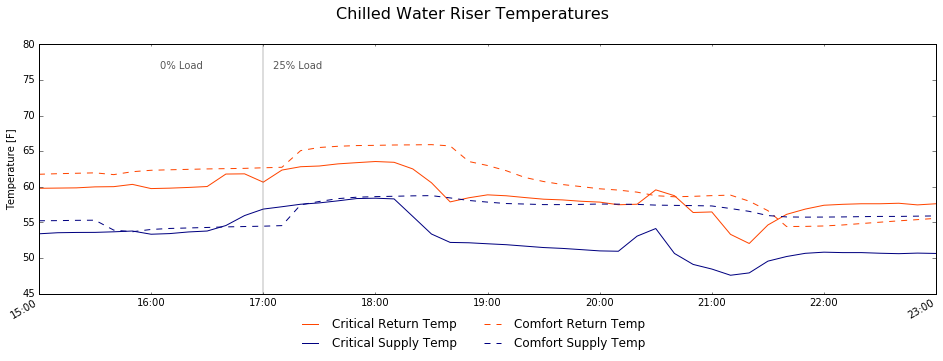

In [23]:
DELTA=(0.1)

Y_LABEL=('Temperature [F]')

fig = plt.figure()
ax = fig.add_subplot(111)
  
TEMP1_DATA=CHW_DATA[0]
GRAPH_COLUMNS=TEMP1_DATA.columns[[2,3]]
GRAPH1=TEMP1_DATA[GRAPH_COLUMNS]
GRAPH1_LEGEND=GRAPH1.columns
GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]

TEMP2_DATA=CHW_DATA[1]
GRAPH_COLUMNS=TEMP2_DATA.columns[[2,3]]
GRAPH2=TEMP2_DATA[GRAPH_COLUMNS]
GRAPH2_LEGEND=GRAPH1.columns
GRAPH2=GRAPH2.loc[DOMAIN[0]:DOMAIN[1]]
    
GRAPH1_MAX=80
GRAPH1_MIN=45
DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA*5
LOAD_STEP_POS_1=GRAPH1_MAX-(GRAPH1_MAX-GRAPH1_MIN)*DELTA
    
plt.subplot(1,1,1)    
ax=GRAPH1[GRAPH1_LEGEND[0]].plot(color ='#FF4500', linestyle='solid',lw=1,figsize=(14,5))
for j in range(1,len(GRAPH1_LEGEND)):
    ax=GRAPH1[GRAPH1_LEGEND[j]].plot(ax=ax,color ='#000080', linestyle='solid',lw=1)

ax=GRAPH2[GRAPH2_LEGEND[0]].plot(color ='#FF4500', linestyle='dashed',lw=1,figsize=(14,5))
for j in range(1,len(GRAPH2_LEGEND)):
    ax=GRAPH2[GRAPH2_LEGEND[j]].plot(ax=ax,color ='#000080', linestyle='dashed',lw=1)
    
STEPS_1()
        
ax.set_title('')
plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)
plt.ylabel(Y_LABEL)
plt.xlabel("")
    
       
plt.gcf().autofmt_xdate()
    
fig.suptitle('Chilled Water Riser Temperatures',size=16)
fig.legend([ax.lines[0],ax.lines[1],ax.lines[2],ax.lines[3]], ['Critical Return Temp','Critical Supply Temp','Comfort Return Temp','Comfort Supply Temp'], 'lower center',ncol=2).get_frame().set_linewidth(0.0)
fig.tight_layout(pad=4, w_pad=0.6, h_pad=2)
plt.savefig('04_BTU_METERS.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")

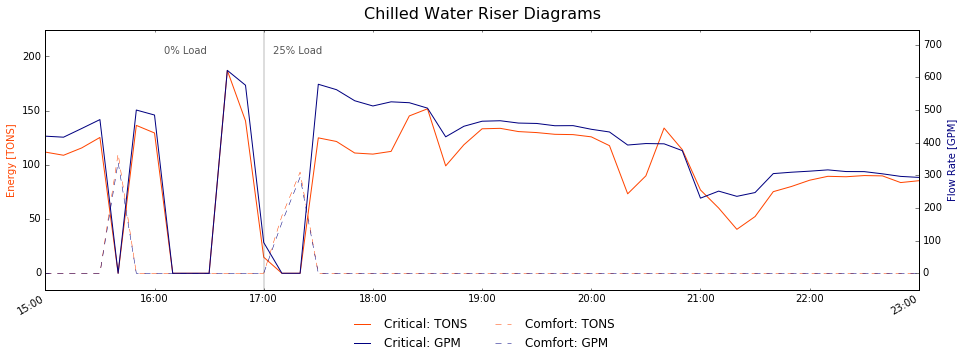

In [24]:
DELTA=(0.2)

fig = plt.figure()

TEMP1_DATA=CHW_DATA[0]
TEMP1_DATA=TEMP1_DATA.loc[DOMAIN[0]:DOMAIN[1]]
TEMP1_DATA=TEMP1_DATA.rename(columns={'Liquid Flow Rate': 'Critical Flow Rate'})

TEMP2_DATA=CHW_DATA[1]
TEMP2_DATA=TEMP2_DATA.loc[DOMAIN[0]:DOMAIN[1]]
TEMP2_DATA=TEMP2_DATA.rename(columns={'Liquid Flow Rate': 'Comfort Flow Rate'})

GRAPH_COLUMNS1=TEMP1_DATA.columns[[0,1]]
GRAPH_COLUMNS2=TEMP2_DATA.columns[[0,1]]
                  
GRAPH1=pd.concat([TEMP1_DATA[GRAPH_COLUMNS1[0]],TEMP2_DATA[GRAPH_COLUMNS2[0]]],axis=1)
GRAPH1_LEGEND=GRAPH1.columns
GRAPH1=GRAPH1.loc[DOMAIN[0]:DOMAIN[1]]
GRAPH1_MAX=GRAPH1.values.max()
GRAPH1_MIN=GRAPH1.values.min()


GRAPH2=pd.concat([TEMP1_DATA[GRAPH_COLUMNS1[1]],TEMP2_DATA[GRAPH_COLUMNS2[1]]],axis=1)
GRAPH2_LEGEND=GRAPH2.columns
GRAPH2=GRAPH2.loc[DOMAIN[0]:DOMAIN[1]]
GRAPH2_MAX=GRAPH2.values.max()
GRAPH2_MIN=GRAPH2.values.min()


DELTA1=(GRAPH1_MAX-GRAPH1_MIN)*DELTA
GRAPH1_MAX=GRAPH1_MAX+DELTA1
GRAPH1_MIN=-15
x=(GRAPH1_MAX/((GRAPH1_MAX-GRAPH1_MIN)))


DELTA2=(GRAPH2_MAX-GRAPH2_MIN)*DELTA
GRAPH2_MAX=GRAPH2_MAX+DELTA2
GRAPH2_MIN=-(GRAPH2_MAX*(1-x)/x)

LOAD_STEP_POS=GRAPH2_MAX*.9

ax1 = fig.add_subplot(111)

ax1=GRAPH1[GRAPH1_LEGEND[0]].plot(color ='#FF4500', linestyle='solid',lw=1,figsize=(14,5))
ax1=GRAPH1[GRAPH1_LEGEND[1]].plot(color ='#FF4500', linestyle='dashed',lw=.5,figsize=(14,5))
plt.ylim(GRAPH1_MIN,GRAPH1_MAX)

ax2 = ax1.twinx()
ax2=GRAPH2[GRAPH2_LEGEND[0]].plot(color ='#000080', linestyle='solid',lw=1,figsize=(14,5))
ax2=GRAPH2[GRAPH2_LEGEND[1]].plot(color ='#000080', linestyle='dashed',lw=.5,figsize=(14,5))


plt.text(Load_Steps[0][2],LOAD_STEP_POS,Load_Steps[0][0], color=SEP,rotation=0)
for k in range(1,len(Load_Steps)):
    plt.text(Load_Steps[k][2],LOAD_STEP_POS,Load_Steps[k][0], color=SEP,rotation=0)
    ax1.axvline(pd.to_datetime(Load_Steps[k][1]), color=SEP, linestyle='solid', lw=SEP_LW)
    
ax1.set_ylabel('Energy [TONS]', color='#FF4500')
ax2.set_ylabel('Flow Rate [GPM]', color='#000080')


plt.xlim(DOMAIN[0], DOMAIN[1])
plt.ylim(GRAPH2_MIN,GRAPH2_MAX)

plt.xlabel("")    
plt.gcf().autofmt_xdate()


fig.suptitle('Chilled Water Riser Diagrams',size=16)
fig.legend([ax1.lines[0],ax2.lines[0],ax1.lines[1],ax2.lines[1]], ['Critical: TONS','Critical: GPM','Comfort: TONS','Comfort: GPM'], 'lower center',ncol=2).get_frame().set_linewidth(0.0)
fig.tight_layout(pad=3, w_pad=0.6, h_pad=0.2)
plt.savefig('04_Chilled Water Riser Diagrams.jpeg', format='jpeg', dpi=DPI, bbox_inches="tight")
